Create a simple RNN with one layer and 5 recurrent neurons using the tanh activation function.  The RNN will run over 2 time steps.  There is an input vector of size 3 at each time step.  

In [1]:
#To support both python2 and python3
from __future__ import division, print_function, unicode_literals

#Common imports
import os
os.chdir("C:\\Users\\Marvine_2\\AppData\\Local\\Programs\\Python\\Python35\\Lib\\site-packages")

# Importing required libraries
import tensorflow as tf
import numpy as np

#Make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "C:\\Users\\Marvine_2\\AppData\\Local\\Programs\\Python\\Python35\\RNNs\\"
CHAPTER_ID = "Basic"
PROJECT_ROOT_DIR = "C:\\Users\\Marvine_2\\AppData\\Local\\Programs\\Python\\"
CHAPTER_ID = "Python35"
path = os.path.join(PROJECT_ROOT_DIR, CHAPTER_ID)

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, CHAPTER_ID)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

Basic - Manual RNN

In [2]:
reset_graph()

n_inputs = 3
n_neurons = 5

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons],dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons,n_neurons],dtype=tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

init = tf.global_variables_initializer()

In [3]:
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

In [4]:
print(Y0_val)

[[-0.06640061  0.96257669  0.68105787  0.70918542 -0.89821595]
 [ 0.99777555 -0.71978879 -0.99657613  0.96739244 -0.99989706]
 [ 0.99999785 -0.99898809 -0.99999887  0.99677628 -0.99999988]
 [ 1.         -1.         -1.         -0.99818921  0.99950868]]


In [5]:
print(Y1_val)

[[ 1.         -1.         -1.          0.40200272 -0.99999994]
 [-0.12210429  0.62805295  0.96718436 -0.99371219 -0.25839329]
 [ 0.99999815 -0.9999994  -0.99999744 -0.85943311 -0.99998796]
 [ 0.99928296 -0.99999809 -0.99990588  0.98579615 -0.92205751]]


Basic - Using static_rnn()

In [6]:
n_inputs = 3
n_neurons = 5

In [7]:
reset_graph()

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, [X0, X1],
                                                dtype=tf.float32)
Y0, Y1 = output_seqs

In [8]:
init = tf.global_variables_initializer()

In [9]:
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

In [10]:
Y0_val

array([[ 0.30741337, -0.32884312, -0.65428472, -0.93850589,  0.52089024],
       [ 0.99122751, -0.95425415, -0.75180781, -0.99952078,  0.98202336],
       [ 0.99992675, -0.99783254, -0.82473516, -0.99999636,  0.99947786],
       [ 0.99677092, -0.68750608,  0.84199691,  0.93039113,  0.81206834]], dtype=float32)

In [11]:
Y1_val

array([[ 0.99998885, -0.99976063, -0.06679297, -0.99998027,  0.99982214],
       [-0.65249425, -0.5152086 , -0.37968948, -0.59225941, -0.08968376],
       [ 0.99862403, -0.99715203, -0.03308632, -0.99915659,  0.99329019],
       [ 0.99681675, -0.95981938,  0.39660627, -0.83076048,  0.79671967]], dtype=float32)

In [12]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "b<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))
    
show_graph(tf.get_default_graph())

Packing sequences

In [13]:
n_steps = 2
n_inputs = 3
n_neurons = 5

In [14]:
reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
X_seqs = tf.unstack(tf.transpose(X, perm=[1, 0, 2]))

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, X_seqs,
                                                dtype=tf.float32)
outputs = tf.transpose(tf.stack(output_seqs), perm=[1, 0, 2])

In [15]:
init = tf.global_variables_initializer()

In [16]:
X_batch = np.array([
        # t = 0      t = 1 
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

In [17]:
print(outputs_val)

[[[-0.45652321 -0.68064117  0.40938237  0.63104498 -0.45732823]
  [-0.94288003 -0.99988687  0.94055808  0.99999845 -0.99999976]]

 [[-0.80015343 -0.99218273  0.78177965  0.99710321 -0.99646091]
  [-0.63711601  0.11300934  0.5798437   0.43105593 -0.6371699 ]]

 [[-0.93605185 -0.99983793  0.93088669  0.9999814  -0.99998313]
  [-0.9165386  -0.99456036  0.89605415  0.99987191 -0.99997509]]

 [[ 0.99273676 -0.99819332 -0.55543649  0.99890316 -0.9953323 ]
  [-0.02746333 -0.73191983  0.7827872   0.95256817 -0.97817719]]]


In [18]:
print(np.transpose(outputs_val, axes=[1, 0, 2])[1])

[[-0.94288003 -0.99988687  0.94055808  0.99999845 -0.99999976]
 [-0.63711601  0.11300934  0.5798437   0.43105593 -0.6371699 ]
 [-0.9165386  -0.99456036  0.89605415  0.99987191 -0.99997509]
 [-0.02746333 -0.73191983  0.7827872   0.95256817 -0.97817719]]


Basic - Using dynamic_rnn()

In [13]:
n_steps = 2
n_inputs = 3
n_neurons = 5

In [14]:
reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

In [15]:
init = tf.global_variables_initializer()

In [13]:
X_batch = np.array([
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})
    
print(outputs_val)

NameError: name 'outputs' is not defined

In [14]:
show_graph(tf.get_default_graph())

Setting sequence lengths

In [15]:
n_steps = 2
n_inputs = 3
n_neurons = 5

reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

In [16]:
seq_length = tf.placeholder(tf.int32, [None])
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32,
                                    sequence_length=seq_length)

In [17]:
init = tf.global_variables_initializer()

In [18]:
X_batch = np.array([
        # step 0     step 1
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2 (padded with zero vectors)
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])
seq_length_batch = np.array([2, 1, 2, 2])

In [19]:
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run(
        [outputs, states], feed_dict={X: X_batch, seq_length: seq_length_batch})

In [20]:
print(outputs_val)

[[[ 0.73155701  0.3483572   0.50582004 -0.22882834 -0.44022721]
  [-0.61832327  0.99999994  0.865848    0.97933763  0.99022454]]

 [[ 0.84387034  0.99697542  0.84789455  0.43032196  0.09275493]
  [ 0.          0.          0.          0.          0.        ]]

 [[ 0.9115923   0.99999052  0.95954448  0.81892222  0.57740241]
  [-0.77545458  0.99987745  0.97847283  0.73172009  0.88877612]]

 [[-0.99952275  0.99977851  0.5974465   0.99309695  0.99847412]
  [-0.62119997  0.54000831  0.96938437  0.19893228  0.19448037]]]


In [21]:
print(states_val)

[[-0.61832327  0.99999994  0.865848    0.97933763  0.99022454]
 [ 0.84387034  0.99697542  0.84789455  0.43032196  0.09275493]
 [-0.77545458  0.99987745  0.97847283  0.73172009  0.88877612]
 [-0.62119997  0.54000831  0.96938437  0.19893228  0.19448037]]


Training a sequence classifier

Note: the book uses tensorflow.contrib.layers.fully_connected() rather than tf.layers.dense() (which did not exist when this chapter was written). It is now preferable to use tf.layers.dense(), because anything in the contrib module may change or be deleted without notice. The dense() function is almost identical to the fully_connected() function. The main differences relevant to this chapter are:

several parameters are renamed: scope becomes name, activation_fn becomes activation (and similarly the _fn suffix is removed from other parameters such as normalizer_fn), weights_initializer becomes kernel_initializer, etc.

the default activation is now None rather than tf.nn.relu.

In [22]:
reset_graph()

n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

logits = tf.layers.dense(states, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                          logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [23]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")
X_test = mnist.test.images.reshape((-1, n_steps, n_inputs))
y_test = mnist.test.labels

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [24]:
n_epochs = 100
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.946667 Test accuracy: 0.9366
1 Train accuracy: 0.966667 Test accuracy: 0.9486
2 Train accuracy: 0.96 Test accuracy: 0.9595
3 Train accuracy: 0.946667 Test accuracy: 0.9649
4 Train accuracy: 0.94 Test accuracy: 0.9578
5 Train accuracy: 0.96 Test accuracy: 0.9717
6 Train accuracy: 0.986667 Test accuracy: 0.9732
7 Train accuracy: 0.986667 Test accuracy: 0.9723
8 Train accuracy: 0.953333 Test accuracy: 0.9739
9 Train accuracy: 0.993333 Test accuracy: 0.9717
10 Train accuracy: 0.986667 Test accuracy: 0.9725
11 Train accuracy: 0.973333 Test accuracy: 0.9738
12 Train accuracy: 1.0 Test accuracy: 0.9769
13 Train accuracy: 0.986667 Test accuracy: 0.9696
14 Train accuracy: 0.966667 Test accuracy: 0.9737
15 Train accuracy: 0.986667 Test accuracy: 0.9728
16 Train accuracy: 0.986667 Test accuracy: 0.975
17 Train accuracy: 0.98 Test accuracy: 0.9743
18 Train accuracy: 0.986667 Test accuracy: 0.9754
19 Train accuracy: 0.986667 Test accuracy: 0.974
20 Train accuracy: 0.986667 Test 

Multi-layer RNN

In [28]:
reset_graph()

n_steps = 28
n_inputs = 28
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

In [29]:
n_neurons = 100
n_layers = 3

layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons,
                                      activation=tf.nn.relu)
          for layer in range(n_layers)]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [30]:
states_concat = tf.concat(axis=1, values=states)
logits = tf.layers.dense(states_concat, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()


In [31]:
n_epochs = 10
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.933333 Test accuracy: 0.9274
1 Train accuracy: 0.966667 Test accuracy: 0.959
2 Train accuracy: 0.96 Test accuracy: 0.9637
3 Train accuracy: 0.966667 Test accuracy: 0.9729
4 Train accuracy: 1.0 Test accuracy: 0.9738
5 Train accuracy: 0.98 Test accuracy: 0.9716
6 Train accuracy: 0.993333 Test accuracy: 0.9787
7 Train accuracy: 0.98 Test accuracy: 0.98
8 Train accuracy: 0.986667 Test accuracy: 0.9797
9 Train accuracy: 0.993333 Test accuracy: 0.9767


Training the RNN to predict time series

In [32]:
t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

In [33]:
path = os.path.join(PROJECT_ROOT_DIR, CHAPTER_ID)
print('path = ', path)

path =  C:\Users\Marvine_2\AppData\Local\Programs\Python\Python35


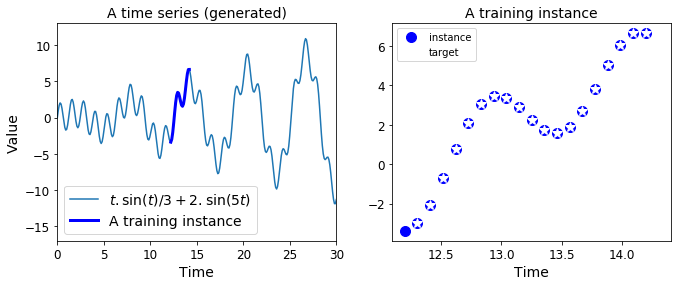

In [34]:
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("A time series (generated)", fontsize=14)
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label="A training instance")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")

#save_fig("time_series_plot")
plt.show()

In [35]:
X_batch, y_batch = next_batch(1, n_steps)

In [36]:
np.c_[X_batch[0], y_batch[0]]

array([[ 1.38452097,  2.05081182],
       [ 2.05081182,  2.29742291],
       [ 2.29742291,  2.0465599 ],
       [ 2.0465599 ,  1.34009916],
       [ 1.34009916,  0.32948704],
       [ 0.32948704, -0.76115235],
       [-0.76115235, -1.68967022],
       [-1.68967022, -2.25492776],
       [-2.25492776, -2.34576159],
       [-2.34576159, -1.96789418],
       [-1.96789418, -1.24220428],
       [-1.24220428, -0.37478448],
       [-0.37478448,  0.39387907],
       [ 0.39387907,  0.84815766],
       [ 0.84815766,  0.85045064],
       [ 0.85045064,  0.3752526 ],
       [ 0.3752526 , -0.48422846],
       [-0.48422846, -1.53852738],
       [-1.53852738, -2.54795941],
       [-2.54795941, -3.28097239]])

Using an OuputProjectionWrapper

Let's create the RNN. It will contain 100 recurrent neurons and we will unroll it over 20 time steps since each traiing instance will be 20 inputs long. Each input will contain only one feature (the value at that time). The targets are also sequences of 20 inputs, each containing a sigle value:

In [37]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

At each time step we now have an output vector of size 100. But what we actually want is a single output value at each time step. The simplest solution is to wrap the cell in an OutputProjectionWrapper.

In [38]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [39]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)

In [40]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [41]:
learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [42]:
saver = tf.train.Saver()

In [43]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    saver.save(sess, "./my_time_series_model") # not shown in the book

0 	MSE: 18.9177
100 	MSE: 0.762543
200 	MSE: 0.290687
300 	MSE: 0.149837
400 	MSE: 0.076777
500 	MSE: 0.0666121
600 	MSE: 0.0619446
700 	MSE: 0.0560287
800 	MSE: 0.0549854
900 	MSE: 0.0516655
1000 	MSE: 0.0537565
1100 	MSE: 0.0515236
1200 	MSE: 0.0442796
1300 	MSE: 0.052246
1400 	MSE: 0.0457671


In [44]:
with tf.Session() as sess:                          # not shown in the book
    saver.restore(sess, "./my_time_series_model")   # not shown

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

INFO:tensorflow:Restoring parameters from ./my_time_series_model


In [45]:
y_pred

array([[[-3.42867851],
        [-2.46577358],
        [-1.16648793],
        [ 0.68973154],
        [ 2.18488884],
        [ 3.16138411],
        [ 3.48058319],
        [ 3.28227615],
        [ 2.80258751],
        [ 2.21267247],
        [ 1.65977919],
        [ 1.55567706],
        [ 1.94990242],
        [ 2.74175882],
        [ 3.86305285],
        [ 5.11279917],
        [ 6.12771845],
        [ 6.67278767],
        [ 6.63269806],
        [ 6.04463673]]], dtype=float32)

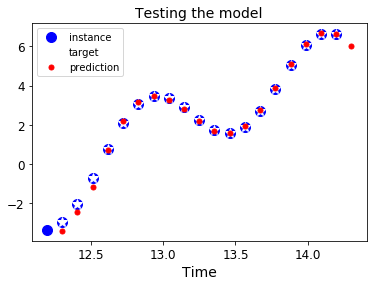

In [46]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

#save_fig("time_series_pred_plot")
plt.show()